In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
data = pd.read_csv("TSLA.csv")
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [114]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [115]:
data['Date'] = pd.to_datetime(data['Date'])

In [116]:
data.drop('Adj Close', axis = 1, inplace=True)
data

,Date,Open,High,Low,Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,40225400


In [117]:
data.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [118]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

Text(0, 0.5, 'Close Price')

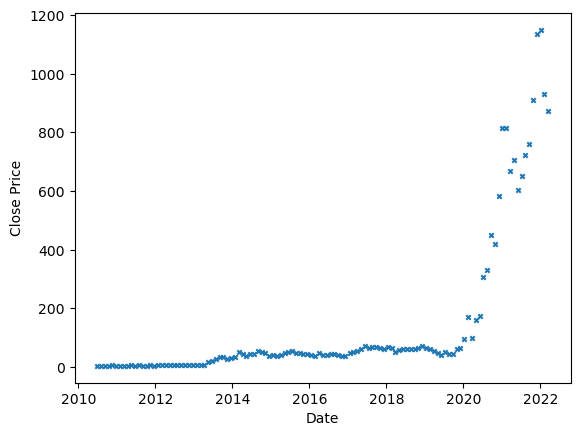

In [119]:
x = data['Date'][::25]
y = data['Close'][::25]
plt.scatter(x,y,marker = 'x', s = 10)
plt.xlabel('Date')
plt.ylabel('Close Price')

In [120]:
data = data[data['Date'].dt.year >=2018]

In [121]:
data

,Date,Open,High,Low,Close,Volume
1891,2018-01-02,62.400002,64.421997,62.200001,64.106003,21761000
1892,2018-01-03,64.199997,65.050003,63.110001,63.450001,22607500
1893,2018-01-04,62.574001,63.709999,61.136002,62.924000,49731500
1894,2018-01-05,63.324001,63.448002,62.400002,63.316002,22956000
1895,2018-01-08,63.200001,67.403999,63.099998,67.281998,49297000
...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,40225400


(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01'),
  Text(18444.0, 0, '2020-07'),
  Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01')])

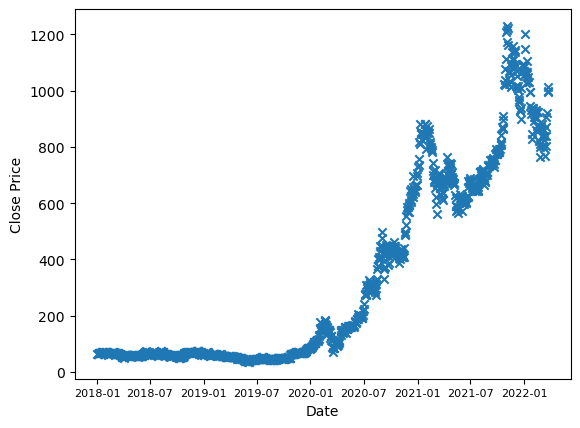

In [122]:
new_x = data['Date']
new_y = data['Close']
plt.scatter(new_x,new_y,marker = 'x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(fontsize=8) 


In [123]:
from sklearn.model_selection import train_test_split

In [124]:
y_data= data['Close']
X_data = data[['Open','High','Low','Volume']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1)

In [125]:
X_train.shape

(798, 4)

In [126]:
X_test.shape

(267, 4)

In [127]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
inter = lr_model.intercept_
inter

-0.45090024057373057

In [128]:
coef = lr_model.coef_
coef

array([-7.22459913e-01,  9.20852641e-01,  8.00647753e-01,  9.91190511e-09])

In [130]:
y_pred = lr_model.predict(X_test)
print(lr_model.score(X_test,y_test))

0.9995597746770588


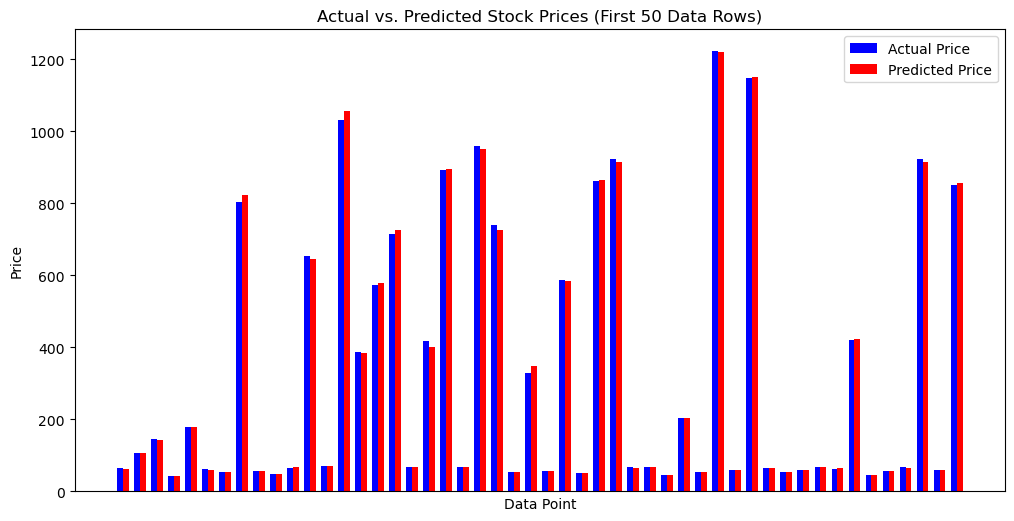

In [142]:
import numpy as np



x_values = np.arange(50)

y_test_subset = y_test[:50]
y_pred_subset = y_pred[:50]

bar_width = 0.35
plt.figure(figsize=(12, 6))


plt.bar(x_values, y_test_subset, bar_width, label='Actual Price', color='blue')
x_values_predicted = x_values + bar_width

plt.bar(x_values_predicted, y_pred_subset, bar_width, label='Predicted Price', color='red')

plt.xticks([])

plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices (First 50 Data Rows)')
plt.legend()





